<a href="https://colab.research.google.com/github/thisisSHAX/ML_Ops_Project-/blob/main/Autism_Screening_Master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=16Pd-BdhzNMzPqPWD6XEu_XFZaGrSqFUz')

In [3]:
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [4]:
df.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

### Feature Set Selection

In [6]:
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

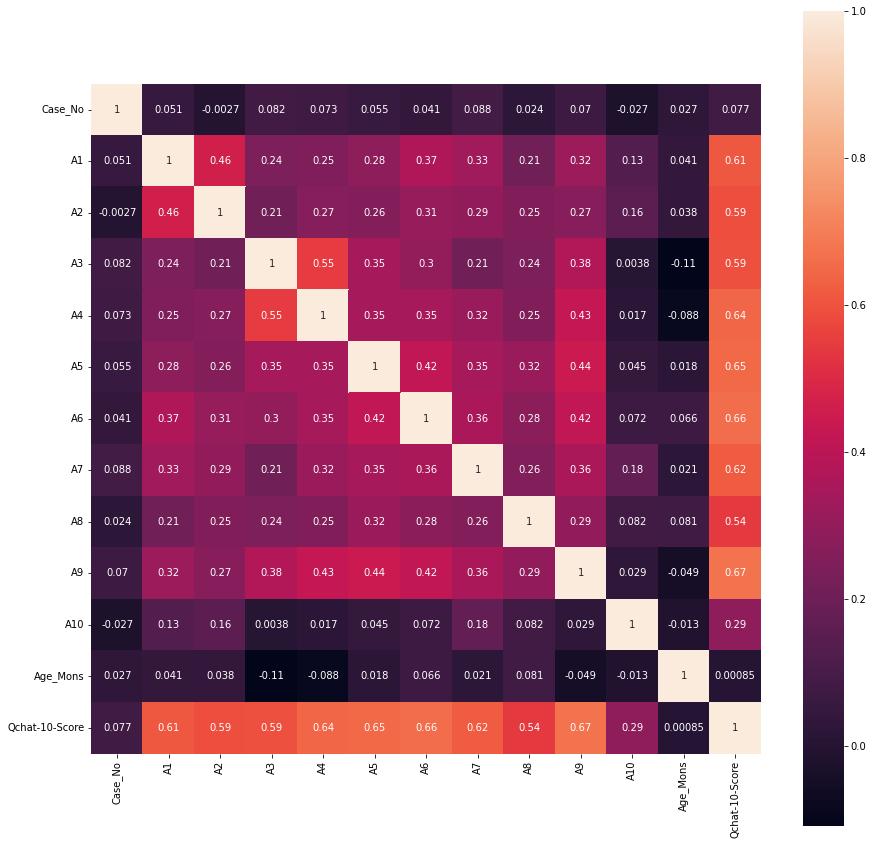

In [7]:
corr = df.corr()
plt.figure(figsize = (15,15))
sns.heatmap(data = corr, annot = True, square = True, cbar = True)

Qchat-10-Score has high correlation with A1 to A9. Hence, we can drop this feature

In [8]:
x_columns = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','Age_Mons','Sex','Ethnicity','Jaundice','Family_mem_with_ASD']

In [9]:
cat_features = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','Sex','Ethnicity','Jaundice','Family_mem_with_ASD']

In [10]:
num_features = list(set(x_columns) - set(cat_features))

In [11]:
num_features

['Age_Mons']

In [12]:
df[x_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   A1                   1054 non-null   int64 
 1   A2                   1054 non-null   int64 
 2   A3                   1054 non-null   int64 
 3   A4                   1054 non-null   int64 
 4   A5                   1054 non-null   int64 
 5   A6                   1054 non-null   int64 
 6   A7                   1054 non-null   int64 
 7   A8                   1054 non-null   int64 
 8   A9                   1054 non-null   int64 
 9   A10                  1054 non-null   int64 
 10  Age_Mons             1054 non-null   int64 
 11  Sex                  1054 non-null   object
 12  Ethnicity            1054 non-null   object
 13  Jaundice             1054 non-null   object
 14  Family_mem_with_ASD  1054 non-null   object
dtypes: int64(11), object(4)
memory usage: 123.6+ KB


### Encode Categorical Variables

In [13]:
# One hot encoding
#encoded_df = pd.get_dummies(df[x_columns], columns=cat_features)
encoded_df = pd.get_dummies(df[x_columns], columns=cat_features, drop_first = True)

In [14]:
encoded_df.sample(5)

,Age_Mons,A1_1,A2_1,A3_1,A4_1,A5_1,A6_1,A7_1,A8_1,A9_1,A10_1,Sex_m,Ethnicity_Latino,Ethnicity_Native Indian,Ethnicity_Others,Ethnicity_Pacifica,Ethnicity_White European,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_mixed,Ethnicity_south asian,Jaundice_yes,Family_mem_with_ASD_yes
273,36,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
327,12,0,1,1,1,1,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0
466,25,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0
176,33,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1
443,28,1,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [15]:
x_features = list(encoded_df.columns)

In [16]:
encoded_df.shape

(1054, 24)

### Data Splitting

In [17]:
X = encoded_df

In [18]:
Y = pd.get_dummies(df['Class/ASD Traits '], drop_first=True)

In [19]:
X

,Age_Mons,A1_1,A2_1,A3_1,A4_1,A5_1,A6_1,A7_1,A8_1,A9_1,A10_1,Sex_m,Ethnicity_Latino,Ethnicity_Native Indian,Ethnicity_Others,Ethnicity_Pacifica,Ethnicity_White European,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_mixed,Ethnicity_south asian,Jaundice_yes,Family_mem_with_ASD_yes
0,28,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1,36,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
2,36,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0
3,24,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,20,1,1,0,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,24,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1050,12,0,0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0
1051,18,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0
1052,19,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1


In [20]:
Y

,Yes
0,0
1,1
2,1
3,1
4,1
...,...
1049,0
1050,1
1051,1
1052,0


In [21]:
#Checking imbalance
Y.sum()/len(Y)

Yes    0.690702
dtype: float64

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# Splitting
train_X, test_X, train_Y, test_Y = train_test_split(df[x_columns], Y, test_size=0.2, random_state=1)

train_X, prod_X, train_Y, prod_Y = train_test_split(train_X, train_Y, test_size=0.25, random_state=2) # 0.25 x 0.8 = 0.2

In [24]:
# Splitting after One - Hot Encoding
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

X_train, X_prod, Y_train, Y_prod = train_test_split(X_train, Y_train, test_size=0.25, random_state=2) # 0.25 x 0.8 = 0.2

In [25]:
X_train.shape

(632, 24)

In [26]:
X_test.shape

(211, 24)

In [27]:
X_prod.shape

(211, 24)

## Saving in different formats

In [28]:
import os

In [29]:
#Without Encoding
train_X.to_csv("./sample_data/train_x.csv")
test_X.to_csv("./sample_data/test_x.csv")
prod_X.to_csv("./sample_data/prod_x.csv")

In [30]:
#With Encoding
X_train.to_csv("./sample_data/x_train.csv")
X_test.to_csv("./sample_data/x_test.csv")
X_prod.to_csv("./sample_data/x_prod.csv")

In [31]:
#pickle
train_X.to_pickle("./sample_data/train_x.pkl")
test_X.to_pickle("./sample_data/test_x.pkl")
prod_X.to_pickle("./sample_data/prod_x.pkl")

In [32]:
#parquet
train_X.to_parquet("./sample_data/train_x.parquet")
test_X.to_parquet("./sample_data/test_x.parquet")
prod_X.to_parquet("./sample_data/prod_x.parquet")

In [33]:
#pickle with encoding
X_train.to_pickle("./sample_data/x_train.pkl")
X_test.to_pickle("./sample_data/x_test.pkl")
X_prod.to_pickle("./sample_data/x_prod.pkl")

In [34]:
#parquet with encoding
X_train.to_parquet("./sample_data/x_train.parquet")
X_test.to_parquet("./sample_data/x_test.parquet")
X_prod.to_parquet("./sample_data/x_prod.parquet")

In [35]:
ls -al sample_data

total 55912
drwxr-xr-x 1 root root     4096 Nov 22 19:35 ./
drwxr-xr-x 1 root root     4096 Nov 22 19:36 ../
-rwxr-xr-x 1 root root     1697 Jan  1  2000 anscombe.json*
-rw-r--r-- 1 root root   301141 Nov 18 14:36 california_housing_test.csv
-rw-r--r-- 1 root root  1706430 Nov 18 14:36 california_housing_train.csv
-rw-r--r-- 1 root root 18289443 Nov 18 14:36 mnist_test.csv
-rw-r--r-- 1 root root 36523880 Nov 18 14:36 mnist_train_small.csv
-rw-r--r-- 1 root root     9836 Nov 22 20:33 prod_x.csv
-rw-r--r-- 1 root root    12665 Nov 22 20:33 prod_x.parquet
-rw-r--r-- 1 root root    23007 Nov 22 20:33 prod_x.pkl
-rwxr-xr-x 1 root root      930 Jan  1  2000 README.md*
-rw-r--r-- 1 root root     9910 Nov 22 20:33 test_x.csv
-rw-r--r-- 1 root root    12628 Nov 22 20:33 test_x.parquet
-rw-r--r-- 1 root root    22987 Nov 22 20:33 test_x.pkl
-rw-r--r-- 1 root root    29409 Nov 22 20:33 train_x.csv
-rw-r--r-- 1 root root    16157 Nov 22 20:33 train_x.parquet
-rw-r--r-- 1 root root    66807 Nov 22 

In [36]:
filenames = ['./sample_data/train_x.csv',
             './sample_data/train_x.pkl', 
             './sample_data/train_x.parquet',
             './sample_data/x_train.csv',
             './sample_data/x_train.pkl', 
             './sample_data/x_train.parquet'
            ]

all_filesizes = [os.path.getsize(f) for f in filenames]             
 
filescompare_df = pd.DataFrame( { "formats" : filenames,
                                  "filesize": all_filesizes})

In [37]:
filescompare_df

,formats,filesize
0,./sample_data/train_x.csv,29409
1,./sample_data/train_x.pkl,66807
2,./sample_data/train_x.parquet,16157
3,./sample_data/x_train.csv,33775
4,./sample_data/x_train.pkl,25878
5,./sample_data/x_train.parquet,21823


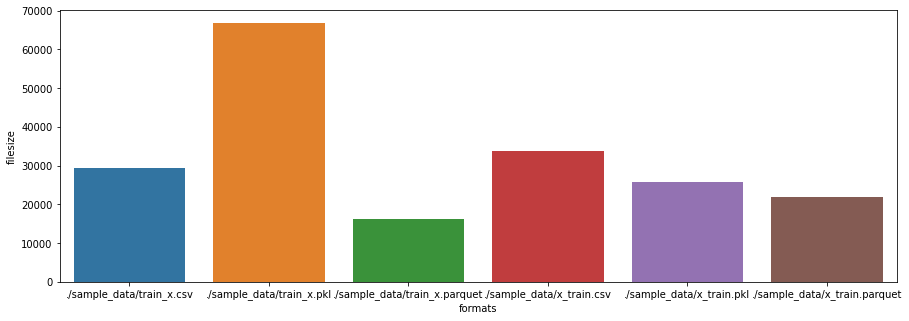

In [38]:
plt.figure( figsize = (15, 5) )
sns.barplot( data = filescompare_df,
           x = 'formats',
           y = 'filesize');

## Read time benchmarking of different formats

In [39]:
%%time 

train_pkl_df = pd.read_pickle("./sample_data/train_x.pkl")

CPU times: user 4.15 ms, sys: 11 µs, total: 4.16 ms
Wall time: 4.14 ms


In [40]:
%%time 

train_parquet_df = pd.read_parquet("./sample_data/train_x.parquet")

CPU times: user 15.3 ms, sys: 6.05 ms, total: 21.4 ms
Wall time: 22.8 ms


In [41]:
%%time 

train_csv_df = pd.read_csv("./sample_data/train_x.csv")

CPU times: user 7.4 ms, sys: 261 µs, total: 7.66 ms
Wall time: 7.13 ms


In [42]:
filenames2 = ['./sample_data/train_x.csv',
             './sample_data/train_x.pkl', 
             './sample_data/train_x.parquet'
            ]          
 
filescompare2_df = pd.DataFrame( { "formats" : filenames2})

In [43]:
import time

t1 = time.perf_counter()
train_df = pd.read_csv("./sample_data/train_x.csv")
time_csv = time.perf_counter() - t1

t1 = time.perf_counter()
train_pkl_df = pd.read_pickle("./sample_data/train_x.pkl")
time_pkl = time.perf_counter() - t1

t1 = time.perf_counter()
train_parquet_df = pd.read_parquet("./sample_data/train_x.parquet")
time_parquet = time.perf_counter() - t1

In [44]:
time_csv

0.007930785999633372

In [45]:
filescompare2_df['read_time'] = [time_csv, time_pkl, time_parquet]

In [46]:
filescompare2_df

,formats,read_time
0,./sample_data/train_x.csv,0.007931
1,./sample_data/train_x.pkl,0.001480
2,./sample_data/train_x.parquet,0.005919


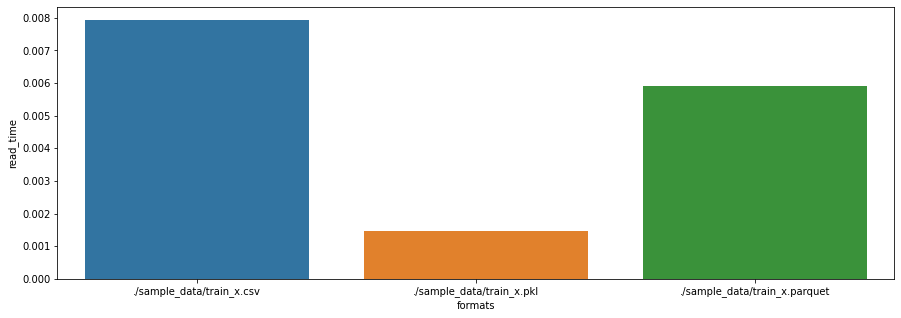

In [47]:
plt.figure( figsize = (15, 5) )
sns.barplot( data = filescompare2_df,
           x = 'formats',
           y = 'read_time');

## Data Profile Report

## Modelling

In [48]:
!pip install wandb

In [49]:
import wandb
wandb.login()

wandb: Currently logged in as: sanjoy95 (use `wandb login --relogin` to force relogin)


True

In [50]:
os.environ["WANDB_API_KEY"] = "49fcf50f2d2b39a64900af07e0a55e578d0336cd"

In [51]:
#!wandb online

In [52]:
def run_model_experiment(model,
                         x_train,
                         y_train,
                         x_test,
                         y_test,
                         name,
                         config = None,
                         tags = None):
  
  model.fit(x_train, y_train)

  wandb.init(project='AutismScreening', config=config, tags = tags)
  wandb.run.name = name
  rmse = np.sqrt(mean_squared_error(y_test, model.predict(x_test)))
  r2 = model.score(x_test, y_test)

  wandb.log( {"rmse" : rmse, 
              "r2": r2} )
  
  wandb.sklearn.plot_regressor(model, 
                               x_train, 
                               x_test, 
                               y_train, 
                               y_test,  
                               model_name=name)
  
  wandb.Artifact(name, 
                 type = 'model',
                 description = config)

  wandb.save()
  wandb.finish()

  return model

### Logistic Regression

In [53]:
#wandb.init(project="ML_Ops_Project", entity="thisisshax")

In [54]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter= 10000)

# fit the model with data
logreg.fit(X_train,Y_train)

#
Y_pred=logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Text(0.5, 257.44, 'Predicted label')

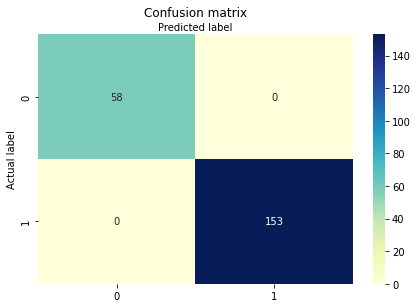

In [55]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [56]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("f1 score:",metrics.f1_score(Y_test, Y_pred))
print("Specificity", cnf_matrix.ravel()[0]/(cnf_matrix.ravel()[0]+cnf_matrix.ravel()[1]))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
f1 score: 1.0
Specificity 1.0


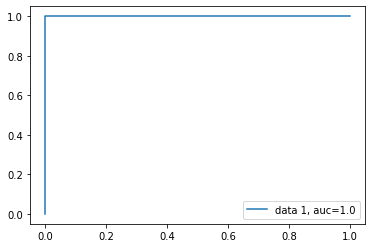

In [57]:
Y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [58]:
lr_model = run_model_experiment(logreg,
                                   X_train,
                                   Y_train,
                                   X_test,
                                   Y_test,
                                   name = 'LogisticRegressionModel',
                                   tags = ['LogisticRegression'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


wandb: 
wandb: Plotting LogisticRegressionModel.
wandb: Logged summary metrics.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

r2,▁
rmse,▁
r2,1.0
rmse,0.0


### KNN

In [59]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=10)

#Train the model using the training sets
knn.fit(X_train, Y_train)

#Predict the response for production dataset
Y_pred = knn.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Text(0.5, 257.44, 'Predicted label')

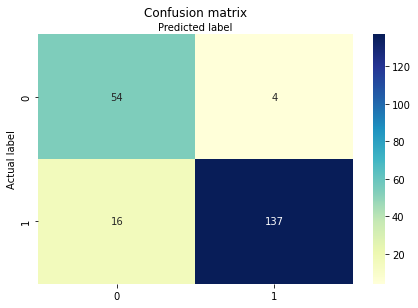

In [60]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [61]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("f1 score:",metrics.f1_score(Y_test, Y_pred))
print("Specificity", cnf_matrix.ravel()[0]/(cnf_matrix.ravel()[0]+cnf_matrix.ravel()[1]))

Accuracy: 0.9052132701421801
Precision: 0.9716312056737588
Recall: 0.8954248366013072
f1 score: 0.9319727891156463
Specificity 0.9310344827586207


In [62]:
knn_model = run_model_experiment(knn,
                                   X_train,
                                   Y_train,
                                   X_test,
                                   Y_test,
                                   name = 'KNNModel',
                                   tags = ['KNN'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


wandb: 
wandb: Plotting KNNModel.
wandb: Logged summary metrics.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation

r2,▁
rmse,▁
r2,0.90521
rmse,0.30787


### Decision Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier
#Create Decision Tree
dt = DecisionTreeClassifier()

#Train the model using the training sets
dt.fit(X_train, Y_train)

#Predict the response for production dataset
Y_pred = dt.predict(X_test)

Text(0.5, 257.44, 'Predicted label')

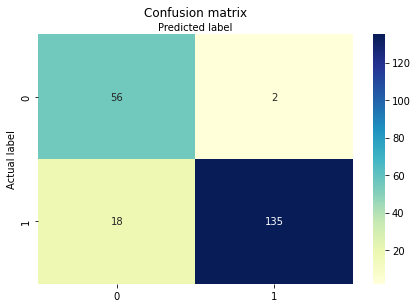

In [64]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [65]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("f1 score:",metrics.f1_score(Y_test, Y_pred))
print("Specificity", cnf_matrix.ravel()[0]/(cnf_matrix.ravel()[0]+cnf_matrix.ravel()[1]))

Accuracy: 0.9052132701421801
Precision: 0.9854014598540146
Recall: 0.8823529411764706
f1 score: 0.9310344827586207
Specificity 0.9655172413793104


In [66]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

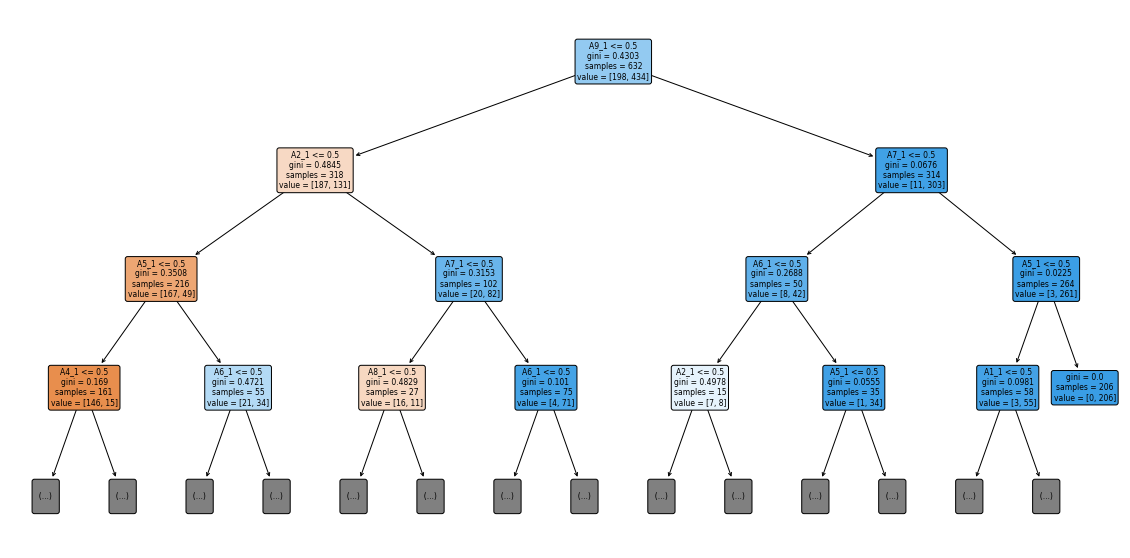

In [67]:
from sklearn.tree import plot_tree
dec_tree = plot_tree(decision_tree=dt, feature_names = X.columns, filled = True , max_depth = 3, precision = 4, rounded = True)

In [68]:
dt_model = run_model_experiment(dt,
                                   X_train,
                                   Y_train,
                                   X_test,
                                   Y_test,
                                   name = 'DecisionTree',
                                   tags = ['DecisionTree'])

wandb: 
wandb: Plotting DecisionTree.
wandb: Logged summary metrics.
wandb: Logged learning curve.
wandb: ERROR regressor is not a regressor. Please try again.
wandb: Logged outlier candidates.
wandb: ERROR regressor is not a regressor. Please try again.
wandb: Logged residuals.
wandb: WARNING Calling run.save without any arguments is deprecated.Changes to attributes are automatically persisted.


r2,▁
rmse,▁
r2,0.90521
rmse,0.30787


In [69]:
api = wandb.Api()

all_runs = api.runs("sanjoy95/autismscreening", order="+summary_metrics.rmse")

for run in all_runs:
  print(f"Model Name: {run.name} and RMSE {run.summary.get('rmse')}")
  print(run.config)

Model Name: LogisticRegressionModel and RMSE 0
{}
Model Name: LogisticRegressionModel and RMSE 0
{}
Model Name: LogisticRegressionModel and RMSE 0
{}
Model Name: LogisticRegressionModel and RMSE 0
{}
Model Name: LogisticRegressionModel and RMSE 0
{}
Model Name: KNNModel and RMSE 0.2838462971031099
{}
Model Name: KNNModel and RMSE 0.2838462971031099
{}
Model Name: KNNModel and RMSE 0.2838462971031099
{}
Model Name: DecisionTree and RMSE 0.3078745359035396
{}
Model Name: DecisionTree and RMSE 0.3078745359035396
{}
Model Name: KNNModel and RMSE 0.3078745359035396
{}
Model Name: KNNModel and RMSE 0.3078745359035396
{}
Model Name: DecisionTree and RMSE 0.31547752114962313
{}
Model Name: DecisionTree and RMSE 0.32290153738191135
{}
Model Name: DecisionTree and RMSE 0.3301586578245267
{}


### Pipeline

In [70]:
!pip install --upgrade category_encoders

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder

In [72]:
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer1 = OneHotEncoder(drop='first', sparse=False)
categorical_transformer2 = TargetEncoder()

In [73]:
preprocessor1 = ColumnTransformer(transformers=[('num', numeric_transformer, num_features),('cat', categorical_transformer1, cat_features)])
preprocessor2 = ColumnTransformer(transformers=[('num', numeric_transformer, num_features),('cat', categorical_transformer2, cat_features)])

In [74]:
train_X, test_X, train_Y, test_Y = train_test_split(df[x_columns], Y, test_size=0.2, random_state=1)

train_X, prod_X, train_Y, prod_Y = train_test_split(train_X, train_Y, test_size=0.25, random_state=2) # 0.25 x 0.8 = 0.2

In [75]:
clf1 = Pipeline(steps=[("preprocessor", preprocessor1),("classifier", LogisticRegression(random_state=100))])
clf1.fit(train_X, train_Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age_Mons']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['A1', 'A2', 'A3', 'A4', 'A5',
                                                   'A6', 'A7', 'A8', 'A9',
                                                   'A10', 'Sex', 'Ethnicity',
                                                   'Jaundice',
                                                   'Family_mem_with_ASD'])])),
                ('classifier', LogisticRegression(random_state=100))])

In [76]:
clf2 = Pipeline(steps=[("preprocessor", preprocessor2),("classifier", LogisticRegression(random_state=100))])
clf2.fit(train_X, train_Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age_Mons']),
                                                 ('cat', TargetEncoder(),
                                                  ['A1', 'A2', 'A3', 'A4', 'A5',
                                                   'A6', 'A7', 'A8', 'A9',
                                                   'A10', 'Sex', 'Ethnicity',
                                                   'Jaundice',
                                                   'Family_mem_with_ASD'])])),
                ('classifier', LogisticRegression(random_state=100))])

In [77]:
pred1_Y = clf1.predict(test_X)

Text(0.5, 637.6, 'Predicted label')

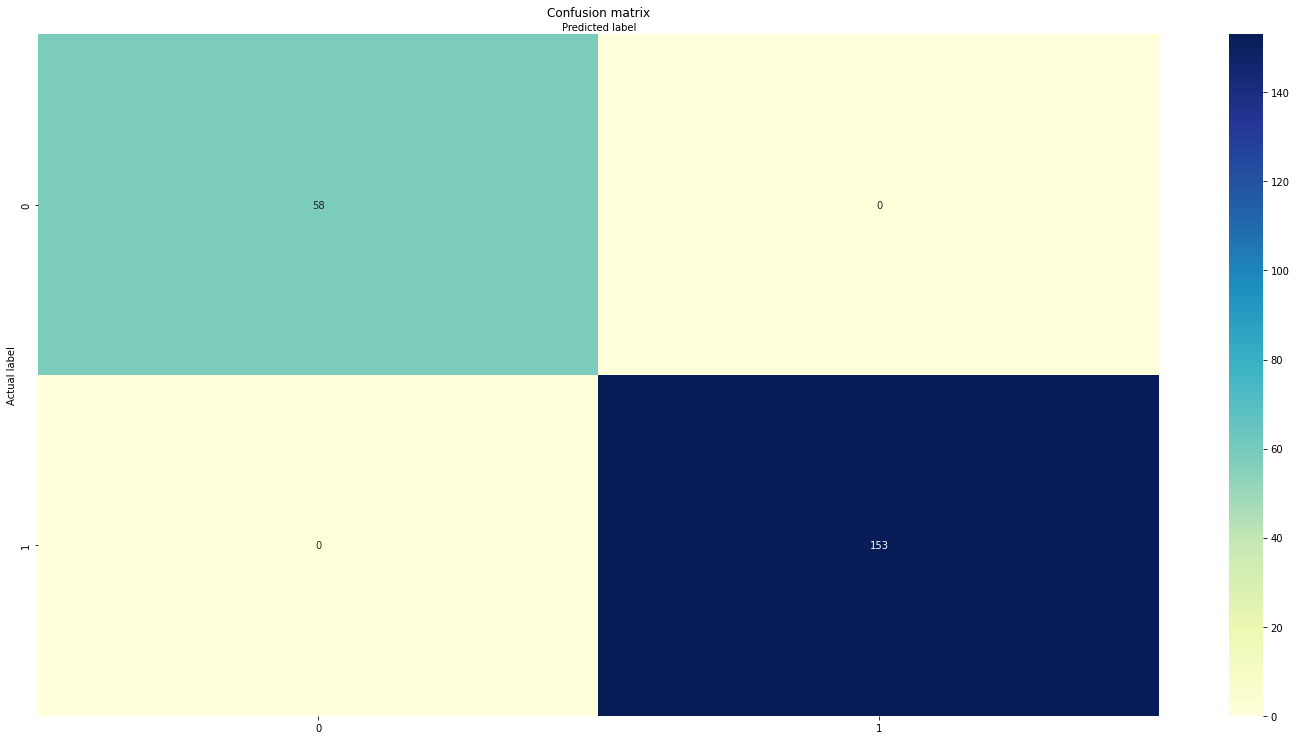

In [78]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(test_Y, pred1_Y)
cnf_matrix

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [79]:
print("Accuracy:",metrics.accuracy_score(test_Y, pred1_Y))
print("Precision:",metrics.precision_score(test_Y, pred1_Y))
print("Recall:",metrics.recall_score(test_Y, pred1_Y))
print("f1 score:",metrics.f1_score(test_Y, pred1_Y))
print("Specificity", cnf_matrix.ravel()[0]/(cnf_matrix.ravel()[0]+cnf_matrix.ravel()[1]))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
f1 score: 1.0
Specificity 1.0


In [80]:
pred2_Y = clf2.predict(test_X)

Text(0.5, 637.6, 'Predicted label')

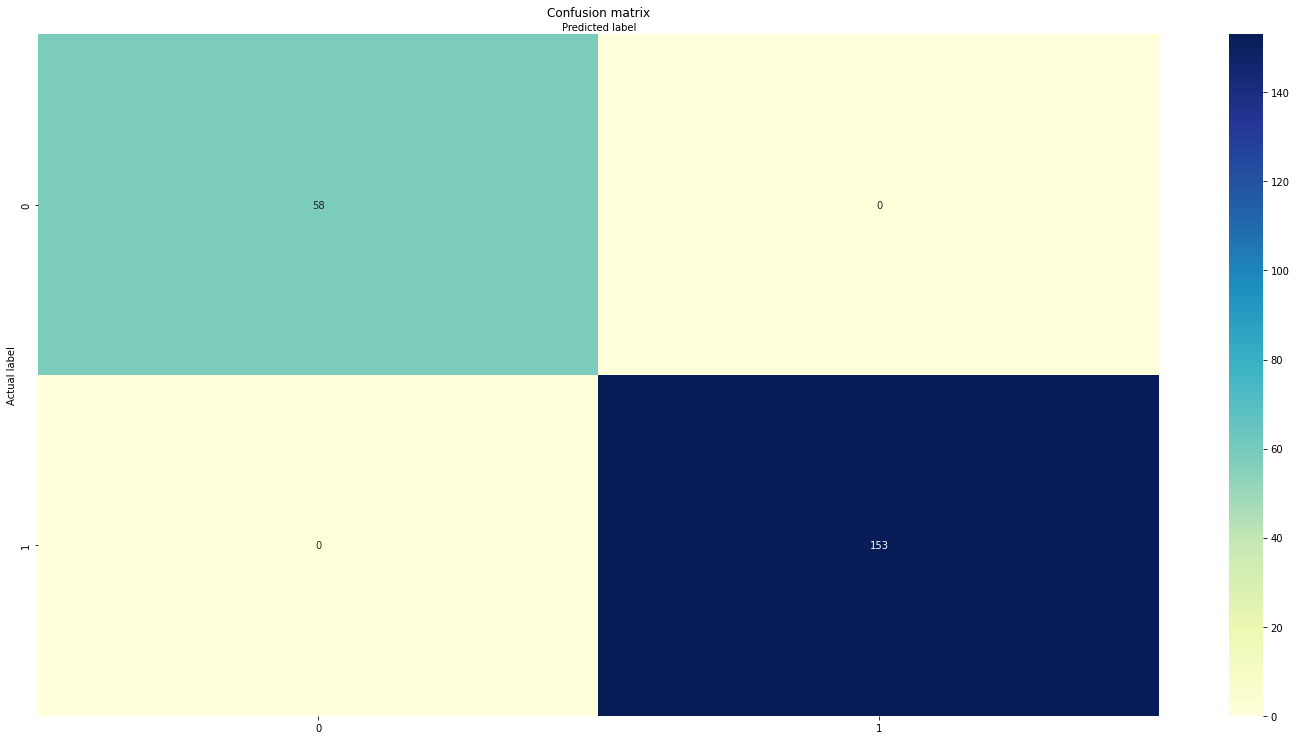

In [81]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(test_Y, pred2_Y)
cnf_matrix

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [82]:
print("Accuracy:",metrics.accuracy_score(test_Y, pred2_Y))
print("Precision:",metrics.precision_score(test_Y, pred2_Y))
print("Recall:",metrics.recall_score(test_Y, pred2_Y))
print("f1 score:",metrics.f1_score(test_Y, pred2_Y))
print("Specificity", cnf_matrix.ravel()[0]/(cnf_matrix.ravel()[0]+cnf_matrix.ravel()[1]))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
f1 score: 1.0
Specificity 1.0


## Deployment

## Monitoring

In [83]:
#Running on production set
pred_final_y = clf1.predict(prod_X)

Text(0.5, 637.6, 'Predicted label')

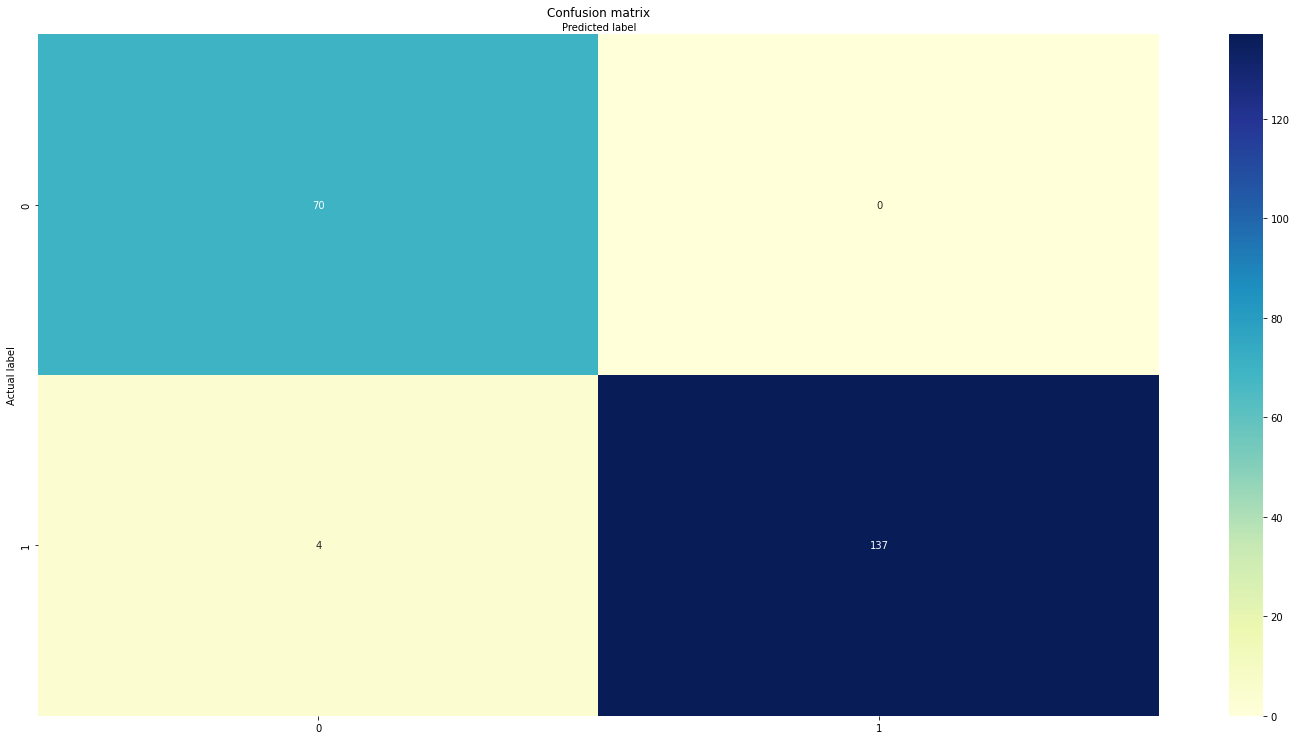

In [84]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(prod_Y, pred_final_y)
cnf_matrix

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [85]:
print("Accuracy:",metrics.accuracy_score(prod_Y, pred_final_y))
print("Precision:",metrics.precision_score(prod_Y, pred_final_y))
print("Recall:",metrics.recall_score(prod_Y, pred_final_y))
print("f1 score:",metrics.f1_score(prod_Y, pred_final_y))
print("Specificity", cnf_matrix.ravel()[0]/(cnf_matrix.ravel()[0]+cnf_matrix.ravel()[1]))

Accuracy: 0.981042654028436
Precision: 1.0
Recall: 0.9716312056737588
f1 score: 0.9856115107913669
Specificity 1.0


### Model Explanation

In [86]:
new_cat_features = list(clf1['preprocessor'].transformers_[1][1].get_feature_names())
new_cat_features

['x0_1',
 'x1_1',
 'x2_1',
 'x3_1',
 'x4_1',
 'x5_1',
 'x6_1',
 'x7_1',
 'x8_1',
 'x9_1',
 'x10_m',
 'x11_Latino',
 'x11_Native Indian',
 'x11_Others',
 'x11_Pacifica',
 'x11_White European',
 'x11_asian',
 'x11_black',
 'x11_middle eastern',
 'x11_mixed',
 'x11_south asian',
 'x12_yes',
 'x13_yes']

In [87]:
len(num_features + new_cat_features)

24

In [88]:
!pip install eli5

In [89]:
import eli5.sklearn

In [89]:
eli5.explain_weights( 
    clf1, 
    feature_names = x_columns)

AttributeError: ignored

In [ ]:
#Explaining for an Autistic person
X_test.iloc[0]

In [ ]:
Y_test.iloc[0]

In [ ]:
eli5.explain_prediction( logreg,
                         X_test.iloc[0],
                         target_names = ['No Autism', 'Autism'] )

In [ ]:
#Explaining for an Non-Autistic person
Y_test.head()

In [ ]:
eli5.explain_prediction( logreg,
                         X_test.iloc[2],
                         target_names = ['No Autism', 'Autism'] )

### Partial Dependency Plots

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Partial Dependency Plot")
PartialDependenceDisplay.from_estimator(logreg,
                                        X_test,
                                        features = ['Family_mem_with_ASD_yes'],
                                        feature_names = x_features,
                                        ax = ax);

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Partial Dependency Plot")
PartialDependenceDisplay.from_estimator(logreg,
                                        X_test,
                                        features = ['Age_Mons'],
                                        feature_names = x_features,
                                        ax = ax);

### LIME

In [ ]:
!pip install lime

In [ ]:
import lime
import lime.lime_tabular

In [ ]:
explainer = (lime
             .lime_tabular
             .LimeTabularExplainer(training_data = X_train.to_numpy(), 
                                   training_labels = Y_train,                                   
                                   feature_names = x_features, 
                                   class_names = ['No Autism', 'Autism'],
                                   categorical_features = ['Family_mem_with_ASD_yes'],
                                   categorical_names = ['Family_mem_with_ASD_yes'], 
                                   kernel_width=3,
                                   verbose = True ))

In [ ]:
exp = explainer.explain_instance( X_test.iloc[0].to_numpy(), 
                                  logreg.predict_proba )

In [ ]:
exp.show_in_notebook(show_table=True, show_all=False)

In [ ]:
exp = explainer.explain_instance( X_test.iloc[2].to_numpy(), 
                                  logreg.predict_proba )

In [ ]:
exp.show_in_notebook(show_table=True, show_all=False)

### Shapley Values

In [ ]:
!pip install shap

In [ ]:
import shap

In [ ]:
row_to_show = 0
data_for_prediction = X_test.iloc[row_to_show]
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
dt.predict_proba(data_for_prediction_array)

In [ ]:
explainer = shap.TreeExplainer(dt)

shap_values = explainer.shap_values(data_for_prediction_array)

In [ ]:
shap.initjs()
shap.force_plot( explainer.expected_value[1], 
                 shap_values[1], 
                 data_for_prediction,
                 figsize=(20, 2) )

In [ ]:
row_to_show = 2
data_for_prediction = X_test.iloc[row_to_show]
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
dt.predict_proba(data_for_prediction_array)

shap_values = explainer.shap_values(data_for_prediction_array)

shap.initjs()
shap.force_plot( explainer.expected_value[1], 
                 shap_values[1], 
                 data_for_prediction,
                 figsize=(20, 2) )

### Global Explanation of SHAP

In [ ]:
explainer = shap.TreeExplainer( dt )
shap_values = explainer.shap_values( X_train )

In [ ]:
shap.summary_plot( shap_values[1], X_train, plot_type = 'dot' )

In [ ]:
explainer.expected_value

In [ ]:
shap.initjs()
shap.force_plot( explainer.expected_value[1], 
                 shap_values[1], 
                 X_train )

### Individual Conditional Expectations (ICE)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("Individual Conditional Expectations")

display = PartialDependenceDisplay.from_estimator(
    logreg,
    X_train,
    features=["Age_Mons"],
    kind="individual",
    subsample=100,
    n_jobs=3,
    grid_resolution=20,
    random_state=0,
    ice_lines_kw={"color": "tab:blue", "alpha": 0.5, "linewidth": 0.5},
    ax = ax
)

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("Individual Conditional Expectations")

display = PartialDependenceDisplay.from_estimator(
    logreg,
    X_train,
    features=["Age_Mons"],
    kind="both",
    subsample=100,
    n_jobs=3,
    grid_resolution=20,
    random_state=0,
    ice_lines_kw={"color": "tab:blue", "alpha": 0.5, "linewidth": 0.5},
    pd_line_kw={"color": "tab:orange", "linestyle": "--"},
    ax = ax
)

###Model Drift


In [90]:
new_cat_features = list(clf1['preprocessor'].transformers_[1][1].get_feature_names())
new_cat_features

['x0_1',
 'x1_1',
 'x2_1',
 'x3_1',
 'x4_1',
 'x5_1',
 'x6_1',
 'x7_1',
 'x8_1',
 'x9_1',
 'x10_m',
 'x11_Latino',
 'x11_Native Indian',
 'x11_Others',
 'x11_Pacifica',
 'x11_White European',
 'x11_asian',
 'x11_black',
 'x11_middle eastern',
 'x11_mixed',
 'x11_south asian',
 'x12_yes',
 'x13_yes']

In [91]:
len(num_features + new_cat_features)

24

In [92]:
prod_X

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD
431,0,1,0,0,0,0,1,0,0,0,35,f,asian,yes,no
778,0,0,1,0,1,1,1,1,0,1,34,f,asian,no,no
806,1,1,0,0,1,1,1,0,1,1,36,m,White European,no,yes
263,1,0,1,1,0,1,0,0,0,0,30,m,middle eastern,no,no
663,1,0,0,0,1,0,1,1,1,0,14,m,asian,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,1,0,1,1,1,1,0,1,0,0,34,m,asian,no,no
706,1,0,0,1,0,0,1,0,1,1,24,m,White European,yes,yes
522,1,1,1,1,0,0,1,1,1,1,24,m,black,yes,no
16,0,0,0,0,0,0,0,0,0,0,36,m,middle eastern,no,yes


Preparing Production Data

In [93]:
prod_X = prod_X.reset_index()
prod_X

,index,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD
0,431,0,1,0,0,0,0,1,0,0,0,35,f,asian,yes,no
1,778,0,0,1,0,1,1,1,1,0,1,34,f,asian,no,no
2,806,1,1,0,0,1,1,1,0,1,1,36,m,White European,no,yes
3,263,1,0,1,1,0,1,0,0,0,0,30,m,middle eastern,no,no
4,663,1,0,0,0,1,0,1,1,1,0,14,m,asian,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,353,1,0,1,1,1,1,0,1,0,0,34,m,asian,no,no
207,706,1,0,0,1,0,0,1,0,1,1,24,m,White European,yes,yes
208,522,1,1,1,1,0,0,1,1,1,1,24,m,black,yes,no
209,16,0,0,0,0,0,0,0,0,0,0,36,m,middle eastern,no,yes


In [94]:
prod_X_cols = clf1.named_steps['preprocessor'].transform(prod_X[x_columns])
prod_X_cols

array([[ 0.88057225,  0.        ,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.75266564,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.00847886,  1.        ,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.52640047,  1.        ,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.00847886,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.65430708,  1.        ,  1.        , ...,  1.        ,
         0.        ,  0.        ]])

In [95]:
prod_X_cols_df = pd.DataFrame(prod_X_cols, columns  = num_features + new_cat_features)
prod_X_cols_df

,Age_Mons,x0_1,x1_1,x2_1,x3_1,x4_1,x5_1,x6_1,x7_1,x8_1,x9_1,x10_m,x11_Latino,x11_Native Indian,x11_Others,x11_Pacifica,x11_White European,x11_asian,x11_black,x11_middle eastern,x11_mixed,x11_south asian,x12_yes,x13_yes
0,0.880572,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.752666,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.008479,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.241039,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-1.805467,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,0.752666,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
207,-0.526400,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
208,-0.526400,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
209,1.008479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [96]:
prod_X_cols_df_final = pd.concat([prod_X[num_features], prod_X_cols_df[new_cat_features]], axis = 1)
prod_X_cols_df_final

,Age_Mons,x0_1,x1_1,x2_1,x3_1,x4_1,x5_1,x6_1,x7_1,x8_1,x9_1,x10_m,x11_Latino,x11_Native Indian,x11_Others,x11_Pacifica,x11_White European,x11_asian,x11_black,x11_middle eastern,x11_mixed,x11_south asian,x12_yes,x13_yes
0,35,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,34,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,36,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,30,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,14,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,34,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
207,24,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
208,24,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
209,36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [97]:
prod_X_cols_df_final['prediction'] = clf1.predict(prod_X[x_columns])
prod_X_cols_df_final

,Age_Mons,x0_1,x1_1,x2_1,x3_1,x4_1,x5_1,x6_1,x7_1,x8_1,x9_1,x10_m,x11_Latino,x11_Native Indian,x11_Others,x11_Pacifica,x11_White European,x11_asian,x11_black,x11_middle eastern,x11_mixed,x11_south asian,x12_yes,x13_yes,prediction
0,35,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,34,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,36,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,30,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,14,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,34,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
207,24,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
208,24,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
209,36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0


In [98]:
train_X

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD
462,1,1,1,1,1,1,1,0,1,0,19,m,asian,no,no
852,1,1,0,1,1,0,1,1,1,0,18,m,black,yes,yes
1010,0,1,1,1,1,1,1,1,1,1,30,m,Latino,no,no
296,1,0,0,0,1,0,0,0,0,1,33,m,White European,no,no
573,0,0,1,1,0,1,0,1,0,0,32,f,White European,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,1,1,0,1,1,0,1,1,1,1,18,f,White European,no,no
787,0,0,0,1,1,0,1,1,1,0,36,m,asian,no,no
637,0,0,0,0,0,1,0,1,0,0,36,f,asian,no,no
624,1,1,0,0,1,1,1,0,1,1,27,m,White European,no,no


In [99]:
train_x_new = train_X.reset_index()
train_x_cols = clf1.named_steps['preprocessor'].transform(train_x_new)
train_x_cols_df = pd.DataFrame(train_x_cols, columns  = num_features + new_cat_features)
train_x_cols_df_final = pd.concat([train_x_new[num_features], train_x_cols_df[new_cat_features]], axis = 1)
train_x_cols_df_final['prediction'] = clf1.predict(train_X[x_columns])
train_x_cols_df_final['Class/ASD Traits'] = np.array(Y_train)
train_x_cols_df_final

,Age_Mons,x0_1,x1_1,x2_1,x3_1,x4_1,x5_1,x6_1,x7_1,x8_1,x9_1,x10_m,x11_Latino,x11_Native Indian,x11_Others,x11_Pacifica,x11_White European,x11_asian,x11_black,x11_middle eastern,x11_mixed,x11_south asian,x12_yes,x13_yes,prediction,Class/ASD Traits
0,19,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1,18,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,1
2,30,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
3,33,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,32,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,18,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
628,36,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
629,36,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
630,27,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1


In [100]:
!pip install evidently

  Using cached PyYAML-6.0-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (596 kB)
  Using cached statsmodels-0.12.2-cp37-cp37m-manylinux1_x86_64.whl (9.5 MB)
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.1
    Uninstalling statsmodels-0.13.1:
      Successfully uninstalled statsmodels-0.13.1
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 5.4.1
    Uninstalling PyYAML-5.4.1:
      Successfully uninstalled PyYAML-5.4.1


In [101]:
!pip install statsmodels --upgrade
!pip install pyyaml==5.4.1
from evidently.dashboard import Dashboard
from evidently.tabs import DataDriftTab, NumTargetDriftTab

from evidently.model_profile import Profile
from evidently.profile_sections import DataDriftProfileSection

  Using cached statsmodels-0.13.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.8 MB)
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
evidently 0.1.31.dev0 requires statsmodels~=0.12.2, but you have statsmodels 0.13.1 which is incompatible.


  Using cached PyYAML-5.4.1-cp37-cp37m-manylinux1_x86_64.whl (636 kB)
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
evidently 0.1.31.dev0 requires PyYAML~=6.0, but you have pyyaml 5.4.1 which is incompatible.
evidently 0.1.31.dev0 requires statsmodels~=0.12.2, but you have statsmodels 0.13.1 which is incompatible.


/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [102]:
column_mapping = {}

column_mapping['target'] = 'Class/ASD Traits'
column_mapping['prediction'] = 'prediction'
column_mapping['datetime'] = None

column_mapping['numerical_features'] = num_features
column_mapping['categorical_features'] = new_cat_features

In [103]:
column_mapping

{'categorical_features': ['x0_1',
  'x1_1',
  'x2_1',
  'x3_1',
  'x4_1',
  'x5_1',
  'x6_1',
  'x7_1',
  'x8_1',
  'x9_1',
  'x10_m',
  'x11_Latino',
  'x11_Native Indian',
  'x11_Others',
  'x11_Pacifica',
  'x11_White European',
  'x11_asian',
  'x11_black',
  'x11_middle eastern',
  'x11_mixed',
  'x11_south asian',
  'x12_yes',
  'x13_yes'],
 'datetime': None,
 'numerical_features': ['Age_Mons'],
 'prediction': 'prediction',
 'target': 'Class/ASD Traits'}

In [104]:
data_drift_dashboard = Dashboard(tabs=[DataDriftTab])
data_drift_dashboard.calculate(train_x_cols_df_final, 
                               prod_X_cols_df_final, 
                               column_mapping = column_mapping)

In [105]:
data_drift_dashboard.save("newreports/datadriftV1.html")

In [106]:
data_drift_profile = Profile(sections=[DataDriftProfileSection])
data_drift_profile.calculate(train_x_cols_df_final, 
                             prod_X_cols_df_final, 
                             column_mapping = column_mapping)
data_drift_profile.json()

'{"data_drift": {"name": "data_drift", "datetime": "2021-11-22 20:45:06.808706", "data": {"utility_columns": {"date": null, "id": null, "target": "Class/ASD Traits", "prediction": "prediction", "drift_conf_level": 0.95, "drift_features_share": 0.5, "nbinsx": null, "xbins": null}, "cat_feature_names": ["x0_1", "x1_1", "x2_1", "x3_1", "x4_1", "x5_1", "x6_1", "x7_1", "x8_1", "x9_1", "x10_m", "x11_Latino", "x11_Native Indian", "x11_Others", "x11_Pacifica", "x11_White European", "x11_asian", "x11_black", "x11_middle eastern", "x11_mixed", "x11_south asian", "x12_yes", "x13_yes"], "num_feature_names": ["Age_Mons"], "target_names": null, "metrics": {"Age_Mons": {"current_small_hist": [[0.057266982622432856, 0.01974723538704581, 0.02369668246445499, 0.021721958925750375, 0.009873617693522912, 0.0572669826224329, 0.035545023696682436, 0.035545023696682485, 0.015797788309636684, 0.14020537124802496], [12.0, 14.4, 16.8, 19.2, 21.6, 24.0, 26.4, 28.8, 31.2, 33.599999999999994, 36.0]], "ref_small_hi

In [109]:
prod_X_cols_df_final['Class/ASD Traits'] = Y_prod

In [110]:
from evidently.tabs import RegressionPerformanceTab

In [111]:
dashboard = Dashboard(tabs=[RegressionPerformanceTab])

In [112]:
dashboard.calculate(train_x_cols_df_final, 
                    prod_X_cols_df_final, 
                    column_mapping=column_mapping)

In [113]:
dashboard.save("newreports/dataPerormanceV1.html")